# Q-3. 


### Business Understanding:

    In this problem statement we have to build a model that can find the most similar data to a given data point in a          dataset, using 4 different similarity algorithms. 

In [7]:
# Importing libraries

# To read data and numeric operations
import pandas as pd
import json 

# Graph plotting library
import matplotlib.pyplot as plt
import seaborn as sns

# Text based library
import re
import string
import nltk

import os
import random

# Sk-learn library
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# tensorflow library
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense

In [8]:
# Reading dataset

df = pd.read_json('D:\\FSDS-iNeuron\\3.Resource\Dataset\\News_Category_Dataset_v3.json', lines = True)
df

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22
...,...,...,...,...,...,...
209522,https://www.huffingtonpost.com/entry/rim-ceo-t...,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,TECH,Verizon Wireless and AT&T are already promotin...,"Reuters, Reuters",2012-01-28
209523,https://www.huffingtonpost.com/entry/maria-sha...,Maria Sharapova Stunned By Victoria Azarenka I...,SPORTS,"Afterward, Azarenka, more effusive with the pr...",,2012-01-28
209524,https://www.huffingtonpost.com/entry/super-bow...,"Giants Over Patriots, Jets Over Colts Among M...",SPORTS,"Leading up to Super Bowl XLVI, the most talked...",,2012-01-28
209525,https://www.huffingtonpost.com/entry/aldon-smi...,Aldon Smith Arrested: 49ers Linebacker Busted ...,SPORTS,CORRECTION: An earlier version of this story i...,,2012-01-28


### Let's Understand the data

**Dataset information**

This dataset contains around 210k news headlines from 2012 to 2022 from HuffPost. This is one of the biggest news datasets and can serve as a benchmark for a variety of computational linguistic tasks. HuffPost stopped maintaining an extensive archive of news articles sometime after this dataset was first collected in 2018, so it is not possible to collect such a dataset in the present day. Due to changes in the website, there are about 200k headlines between 2012 and May 2018 and 10k headlines between May 2018 and 2022.

**Feature Information**

Each record in the dataset consists of the following attributes:

- category: category in which the article was published.
- headline: the headline of the news article.
- authors: list of authors who contributed to the article.
- link: link to the original news article.
- short_description: Abstract of the news article.
- date: publication date of the article.

There are a total of 42 news categories in the dataset. The top-15 categories and corresponding article counts are as follows:

**Top 15 categories**

- POLITICS: 35602

- WELLNESS: 17945

- ENTERTAINMENT: 17362

- TRAVEL: 9900

- STYLE & BEAUTY: 9814

- PARENTING: 8791

- HEALTHY LIVING: 6694

- QUEER VOICES: 6347

- FOOD & DRINK: 6340

- BUSINESS: 5992

- COMEDY: 5400

- SPORTS: 5077

- BLACK VOICES: 4583

- HOME & LIVING: 4320

- PARENTS: 3955

## Basic analysis and data preprocessing

In [9]:
# Shape of the data

df.shape

(209527, 6)

In [10]:
# Columns of the data

df.columns

Index(['link', 'headline', 'category', 'short_description', 'authors', 'date'], dtype='object')

In [11]:
# Basic information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209527 entries, 0 to 209526
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   link               209527 non-null  object        
 1   headline           209527 non-null  object        
 2   category           209527 non-null  object        
 3   short_description  209527 non-null  object        
 4   authors            209527 non-null  object        
 5   date               209527 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 9.6+ MB


In [12]:
# For categorical features

categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']
print(categorical_features)

['link', 'headline', 'category', 'short_description', 'authors']


In [13]:
# For other type features

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'object']
print(numerical_features)

['date']


In [14]:
# Checking the null values

df.isnull().sum()

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

In [15]:
# Checking the duplicate values

df.duplicated().sum()

13

In [16]:
# Dropping the duplicate values

df = df.drop_duplicates()

In [17]:
# Data types of the dataset

df.dtypes

link                         object
headline                     object
category                     object
short_description            object
authors                      object
date                 datetime64[ns]
dtype: object

In [18]:
df.columns

Index(['link', 'headline', 'category', 'short_description', 'authors', 'date'], dtype='object')

### EDA

**"link"**

In [19]:
df['link'].value_counts()

https://www.huffingtonpost.comhttp://www.nytimes.com/2016/04/08/us/politics/ted-cruz-donors.html                              2
https://www.huffingtonpost.comhttp://elections.huffingtonpost.com/pollster/2016-california-democratic-presidential-primary    2
https://www.huffingtonpost.comhttp://testkitchen.huffingtonpost.com/thecrossing/                                              2
https://www.huffingtonpost.comhttp://recode.net/2015/09/29/twitter-plans-to-go-beyond-its-140-character-limit/                2
https://www.huffingtonpost.comhttp://www.newrepublic.com/article/112892/hell-american-day-care                                2
                                                                                                                             ..
https://www.huffingtonpost.com/entry/snl-seinfeld-reunion-julia-louis-dreyfus_us_57139ae8e4b0018f9cba4a04                     1
https://www.huffingtonpost.com/entry/kesha-coachella-2016_us_5713b8e1e4b0060ccda384db                   

**"headline"**

In [20]:
df['headline'].value_counts()

Sunday Roundup                                                                        90
The 20 Funniest Tweets From Women This Week                                           80
Weekly Roundup of eBay Vintage Clothing Finds (PHOTOS)                                59
Weekly Roundup of eBay Vintage Home Finds (PHOTOS)                                    54
Watch The Top 9 YouTube Videos Of The Week                                            46
                                                                                      ..
Supreme Court Chief Justice John Roberts Swore In Deaf Lawyers Using Sign Language     1
Here Are The Manufacturers Bringing The Most Jobs Back to America                      1
2016 Campaigns Meet With White House To Prep For Obama's Last Days In Office           1
If Toddlers Could Calmly Articulate Their Feelings                                     1
Dwight Howard Rips Teammates After Magic Loss To Hornets                               1
Name: headline, Lengt

#### Observation:
- 'Sunday Roundup' headline is the maximum number of times published as headline

**"category"**

In [21]:
df['category'].value_counts()

POLITICS          35601
WELLNESS          17942
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9811
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3571
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2100
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1443
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

#### Observation:
- 'POLITICS' is the top most category of pubished headline

**"short_description"**

In [22]:
df['short_description'].value_counts()

                                                                                                                                 19712
Welcome to the HuffPost Rise Morning Newsbrief, a short wrap-up of the news to help you start your day.                            192
The stress and strain of constantly being connected can sometimes take your life -- and your well-being -- off course. GPS         125
Want more? Be sure to check out HuffPost Style on Twitter, Facebook, Tumblr, Pinterest and Instagram at @HuffPostStyle. -- Do       91
Do you have a home story idea or tip? Email us at homesubmissions@huffingtonpost.com. (PR pitches sent to this address will         75
                                                                                                                                 ...  
It's one of the thorniest moral dilemmas in tech right now.                                                                          1
The new addition to the family will be a little sibling

#### Observation:
- 'Welcome to the HuffPost Rise Morning Newsbrief, a short wrap-up of the news to help you start your day'  is the most repeated short description

**"authors"**

In [23]:
df['authors'].value_counts()

                                                                          37405
Lee Moran                                                                  2954
Ron Dicker                                                                 2219
Ed Mazza                                                                   1590
Mary Papenfuss                                                             1566
                                                                          ...  
Holly Ramer, Associated Press                                                 1
Gina Carey, The Huffington Post                                               1
Randall Chase, Associated Press                                               1
Stephen Ohlemacher, AP                                                        1
John Giacobbi, Contributor\nTales from the Interweb by The Web Sheriff        1
Name: authors, Length: 29169, dtype: int64

#### Observation:
- 'Lee Moran' has posted the most news

In [24]:
# Geting count for each category

category_count = df['category'].value_counts()
print(category_count)
print(f'There are {len(category_count)} categories of news')

POLITICS          35601
WELLNESS          17942
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9811
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3571
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2100
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1443
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

### Data preprocessing for 'Similarity Score' model

**Considering data from 1, 1, 2019 for better computation and avaid memory error**

In [25]:
new_df = df[df['date'] >= pd.Timestamp(2019,1,1)] 

In [26]:
# Adding a column by combining 'headline' and 'short_description'

new_df['news_text'] = new_df['headline']+' '+new_df['short_description']+' ' +new_df['category']

In [27]:
new_df.head()

,link,headline,category,short_description,authors,date,news_text
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23,Over 4 Million Americans Roll Up Sleeves For O...
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23,"American Airlines Flyer Charged, Banned For Li..."
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23,23 Of The Funniest Tweets About Cats And Dogs ...
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23,The Funniest Tweets From Parents This Week (Se...
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22,Woman Who Called Cops On Black Bird-Watcher Lo...


In [28]:
# Dropping unnecessary columns

new_df = new_df.drop(["link", "authors", "category", "date", "short_description"],axis = 1)

# Only 'headline' and 'news_text' column left

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer    # To convert the text data into TF-IDF features
from sklearn.metrics.pairwise import cosine_similarity     # To calculate the cosine similarity between vectors

In [30]:
vectorizer = TfidfVectorizer()
features   = vectorizer.fit_transform(new_df['news_text'])    # Using Tfidfvectorizer let's compute the word counts

In [31]:
# Finding cosine similarity distance between the words

cosine_sim = cosine_similarity(features,features)
cosine_sim

array([[1.        , 0.03571333, 0.00843268, ..., 0.05430432, 0.03424534,
        0.00408301],
       [0.03571333, 1.        , 0.01328057, ..., 0.04871009, 0.01701234,
        0.0288493 ],
       [0.00843268, 0.01328057, 1.        , ..., 0.00707633, 0.00188112,
        0.03371626],
       ...,
       [0.05430432, 0.04871009, 0.00707633, ..., 1.        , 0.08252421,
        0.00901901],
       [0.03424534, 0.01701234, 0.00188112, ..., 0.08252421, 1.        ,
        0.00573627],
       [0.00408301, 0.0288493 , 0.03371626, ..., 0.00901901, 0.00573627,
        1.        ]])

In [32]:
i =  pd.Series(new_df.index, index=new_df['headline']).drop_duplicates()    # A Pandas Series is like a column in a table. It is a one-dimensional array holding data of any type

In [33]:
print(i)

headline
Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters                    0
American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video       1
23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23)                           2
The Funniest Tweets From Parents This Week (Sept. 17-23)                                        3
Woman Who Called Cops On Black Bird-Watcher Loses Lawsuit Against Ex-Employer                   4
                                                                                             ... 
Alabama Sheriff Pocketed $1.5 Million In ICE Funds For Immigrant Food: Report                7518
Minivan Slams Into New Year's Revelers In Tokyo, Injuring 8 People                           7519
Kim Jong Un Says He's Ready To Meet With Trump Again In New Year's Speech                    7520
Sandra Bullock's New Netflix Movie Inspires People To Take 'Bird Box' Challenge              7521
Pete Davids

In [34]:
# Defining a function to get the most similar articles

def get_similar_articles(article_title, cosine_sim_matrix, index_series, top_k=5):    # with default argument k=5
    # Get the index of the given article
    article_index = index_series[article_title]
    
    # Get the cosine similarity scores for the given article
    similarity_scores = cosine_sim_matrix[article_index]
    
    # Sort the indices based on the similarity scores
    sorted_indices = similarity_scores.argsort()[::-1]
    
    # Get the top k similar articles (excluding the given article itself)
    top_indices = sorted_indices[1:top_k+1]
    
    # Retrieve the headlines and similarity scores of the top similar articles
    similar_articles = new_df['headline'].iloc[top_indices]
    similarity_scores = similarity_scores[top_indices]
    
    return similar_articles, similarity_scores

In [35]:
new_df['headline'][118]

'Tropical Storm Danielle Strengthens Into Hurricane, No Current Threat To Land'

In [36]:
# Example usage:

article_title = "Tropical Storm Danielle Strengthens Into Hurricane, No Current Threat To Land"
similar_articles, similarity_scores = get_similar_articles(article_title, cosine_sim, i, top_k=5)

In [37]:
# Print the similar articles and their similarity scores

for article, score in zip(similar_articles, similarity_scores):
    print(f"Similar Article: {article}")
    print(f"Similarity Score: {score}\n")

Similar Article: What To Know About Tropical Storm Henri As It Heads North
Similarity Score: 0.3595058502598791

Similar Article: Hurricane Dorian Strengthens To Category 4 Storm
Similarity Score: 0.34790089756687487

Similar Article: Tropical Storm Eta Expected To Strike Florida Keys As A Hurricane
Similarity Score: 0.34339985697953807

Similar Article: Barry Weakens To Tropical Storm As It Hits Louisiana Coast
Similarity Score: 0.3159380553277229

Similar Article: Tropical Storm Barry Gains Strength As Officials Urge Residents To Prepare For The Worst
Similarity Score: 0.28213145504830356



### Preparing dataset for K-Nearest Neighbour and Conditoinal Probability

In [38]:
# Reading dataset with required column

dataset = df[['headline', 'short_description', 'category']]
dataset.head()

,headline,short_description,category
0,Over 4 Million Americans Roll Up Sleeves For O...,Health experts said it is too early to predict...,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Li...",He was subdued by passengers and crew when he ...,U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs ...,"""Until you have a dog you don't understand wha...",COMEDY
3,The Funniest Tweets From Parents This Week (Se...,"""Accidentally put grown-up toothpaste on my to...",PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Lo...,Amy Cooper accused investment firm Franklin Te...,U.S. NEWS


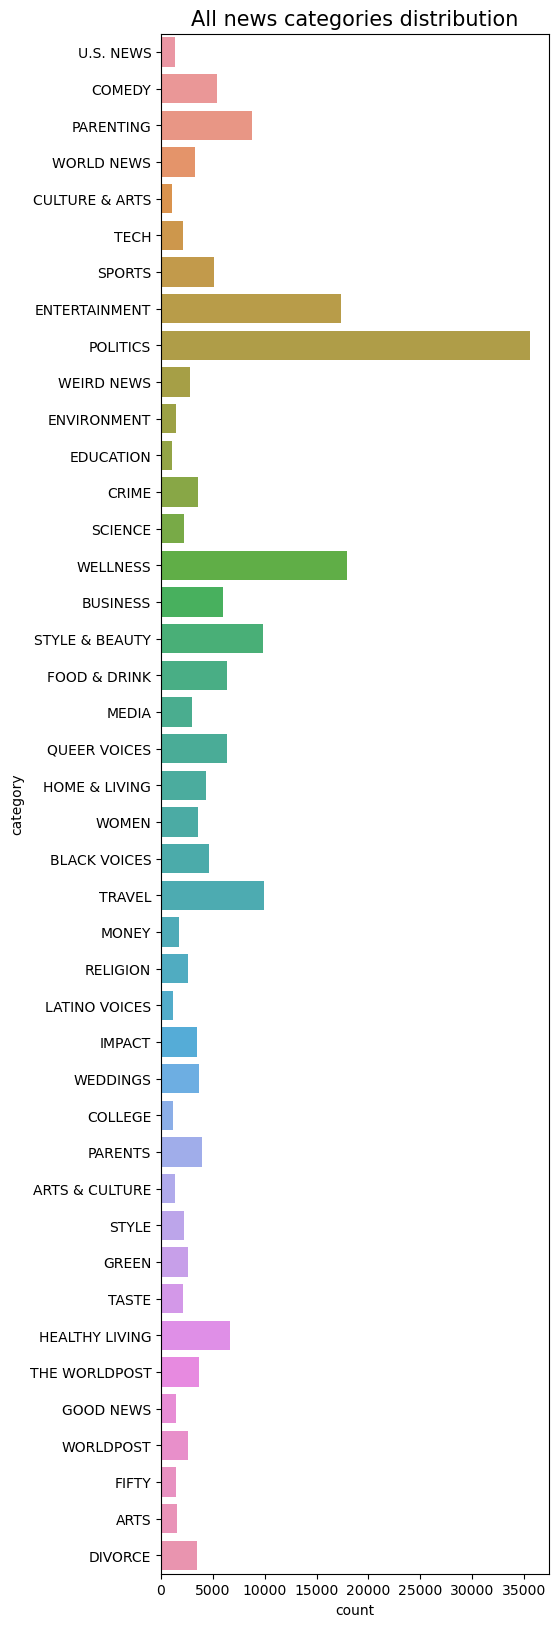

In [39]:
# Ploting  horizontal distribution for category column

plt.figure(figsize = [5, 20])
sns.countplot(y=dataset["category"], orient = 'h')
plt.title("All news categories distribution", fontsize = 15)
plt.show()

#### From the results above, there are in total of 42 categories of news. To accomodate with computing power, we will train models with the top 15 categories bold text

['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY', 'PARENTING', 'HEALTHY LIVING', 'QUEER VOICES', 'FOOD & DRINK', 'BUSINESS', 'COMEDY', 'SPORTS', 'BLACK VOICES', 'HOME & LIVING', 'PARENTS']


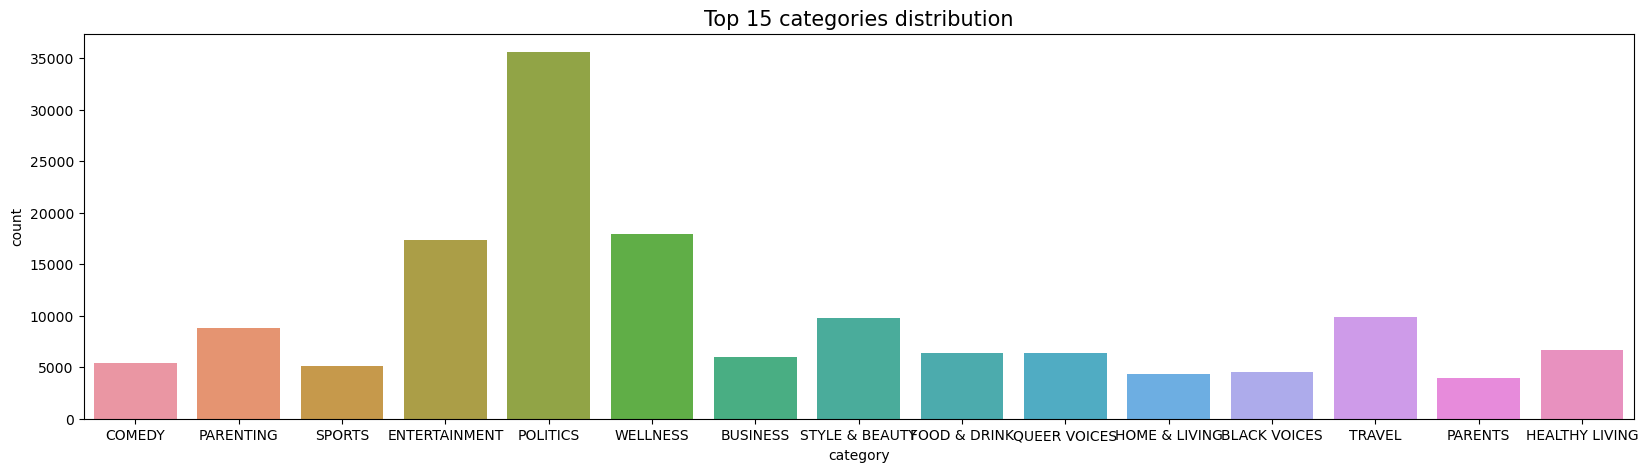

In [40]:
# Considering only top 15 category for train data

top_categories = list(dataset["category"].value_counts().nlargest(15).keys())
print(top_categories)

# Plotting distribution 

dataset_top = dataset[dataset['category'].isin(top_categories)]
plt.figure(figsize = [20, 5])
sns.countplot(x=dataset_top["category"])
plt.title("Top 15 categories distribution", fontsize = 15)
plt.show()

In [49]:
# Summerizing the dataset
from skimpy import skim


skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 209514 │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 6      │ │ datetime64  │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ date                   │      0 │         0 │     2012-01-28      │     2022-09-23      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                       ┃ NA     ┃ NA %      ┃ words per row             ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ link                              │      0 │         0 │                         1 │                210000 │  │
│ │ headline                          │      0 │         0 │                         1 │                210000 │  │
│ │ category                          │      0 │         0 │                         1 │                210000 │  │
│ │ short_description                 │      0 │         0 │                         1 │                210000 │  │
│ │ authors                           │      0 │         0 │                         1 │                210000 │  │
│ └───────────────────────────────────┴────────┴───────────┴───────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [48]:
# Pandas profiling
from pandas_profiling import ProfileReport

pf = ProfileReport(df)

pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

**There are around 35000 news in "POLITICS" group, which is the largest group. But most of the groups contain less than 7000 news. In order to solve imbalanced dataset issue, we use upsample technique.**

In [41]:
# Upsampling the data

SEED = 42
df_list = []

#Get news in top 15 categories

for i in top_categories:
    df_list.append(pd.DataFrame(dataset_top[dataset_top["category"]==i]))
for i in range(len(df_list)):
    df_list[i] = pd.DataFrame(df_list[i][df_list[i]["short_description"]!=""])
for i in range(len(df_list)):
    df_list[i] = df_list[i].sample(df_list[0].shape[0], replace=True, random_state=SEED)
df_upsample = pd.concat(df_list)
print(df_upsample.shape)

(486600, 3)


In [42]:
#Check 5 samples of short description

df_list[0].short_description.iloc[0:5].to_list()

['It was only a matter of time before the Panama Papers controversy and the Unaoil bribery scandal overlapped. Leaked emails',
 "The plan is very hazy, but it's different than what other Republicans have proposed.",
 "MeidasTouch's #GOPBetrayedAmerica spot calls out Republican opposition to a commission to investigate the Jan. 6 insurrection.",
 '"The risks of fracking to our health and to our environment are real," state Attorney General Xavier Becerra says.',
 'Sen. Mitch McConnell (R-Ky.) has long been the most vocal opponent of campaign finance regulation in Congress.']

#### There are punctuations and different forms of words in short description. We will remofve punctuations and links if there are any in the news. Lemmatization technique will be applied to reduce inflectional forms.

### Data Cleaning

In [43]:
#nltk.download('all')
stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

In [44]:
#Clean the text

df_upsample["text"] = df_upsample["headline"] + " " + df_upsample["short_description"]
df_upsample['text'] = df_upsample['text'].map(lambda x: clean_text(x))
X, y = df_upsample['text'], df_upsample["category"]

In [45]:
#Text after cleaning

print(X.iloc[0])

unaoil scandal panama paper matter time panama paper controversy unaoil bribery scandal overlapped leaked email


In [46]:
#Data size after upsampling

print(y.value_counts())

POLITICS          32440
WELLNESS          32440
ENTERTAINMENT     32440
TRAVEL            32440
STYLE & BEAUTY    32440
PARENTING         32440
HEALTHY LIVING    32440
QUEER VOICES      32440
FOOD & DRINK      32440
BUSINESS          32440
COMEDY            32440
SPORTS            32440
BLACK VOICES      32440
HOME & LIVING     32440
PARENTS           32440
Name: category, dtype: int64


In [47]:
# Split data into training data and testing data
# split the data

X_train, X_test, y_train, y_test = train_test_split(df_upsample['text'], df_upsample['category'], test_size=0.2, stratify=df_upsample['category'])
le = preprocessing.LabelEncoder()     # label encoder
le.fit(top_categories)

# category to label

y_train_label = le.transform(y_train)     # Encoding train label
y_test_label = le.transform(y_test)     # Encoding test label

#Use tf-idf vectorizer to fit news

tf_idf_vectorizer = TfidfVectorizer()    #  To convert raw documents into a matrix of TF-IDF features
X_train_t = tf_idf_vectorizer.fit_transform(X_train)
X_test_t = tf_idf_vectorizer.transform(X_test)
print(X_train.shape, X_train_t.shape)

(389280,) (389280, 77547)


## KNN Model

In [42]:
# Building KNN Model

#Fit X to SVD
svd = TruncatedSVD(n_components=7, random_state=SEED,n_iter=7)    # Truncated SVD generates the matrices with the specified number of columns
X_train_t_final = svd.fit_transform(X_train_t)
X_test_t_final = svd.transform(X_test_t)
print(X_train_t_final.shape)

#Build KNN model
knn = KNeighborsClassifier(n_neighbors=7, algorithm='kd_tree')
knn.fit(X_train_t_final, y_train_label)
pred_knn = knn.predict(X_test_t_final)

(389280, 7)


C:\Users\Sai\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### KNN Model validation

In [43]:
# KNN Validation

print("F1 Score:", metrics.f1_score(le.inverse_transform(y_test_label), le.inverse_transform(pred_knn), average='weighted'))
print(metrics.classification_report(le.inverse_transform(y_test_label), le.inverse_transform(pred_knn)))

F1 Score: 0.7162398095575796
                precision    recall  f1-score   support

  BLACK VOICES       0.76      0.93      0.84      6488
      BUSINESS       0.68      0.85      0.76      6488
        COMEDY       0.72      0.89      0.80      6488
 ENTERTAINMENT       0.57      0.37      0.45      6488
  FOOD & DRINK       0.75      0.80      0.78      6488
HEALTHY LIVING       0.70      0.84      0.76      6488
 HOME & LIVING       0.81      0.93      0.86      6488
     PARENTING       0.76      0.66      0.71      6488
       PARENTS       0.80      0.97      0.88      6488
      POLITICS       0.75      0.46      0.57      6488
  QUEER VOICES       0.71      0.78      0.74      6488
        SPORTS       0.74      0.89      0.81      6488
STYLE & BEAUTY       0.79      0.71      0.75      6488
        TRAVEL       0.66      0.55      0.60      6488
      WELLNESS       0.64      0.35      0.45      6488

      accuracy                           0.73     97320
     macro avg   

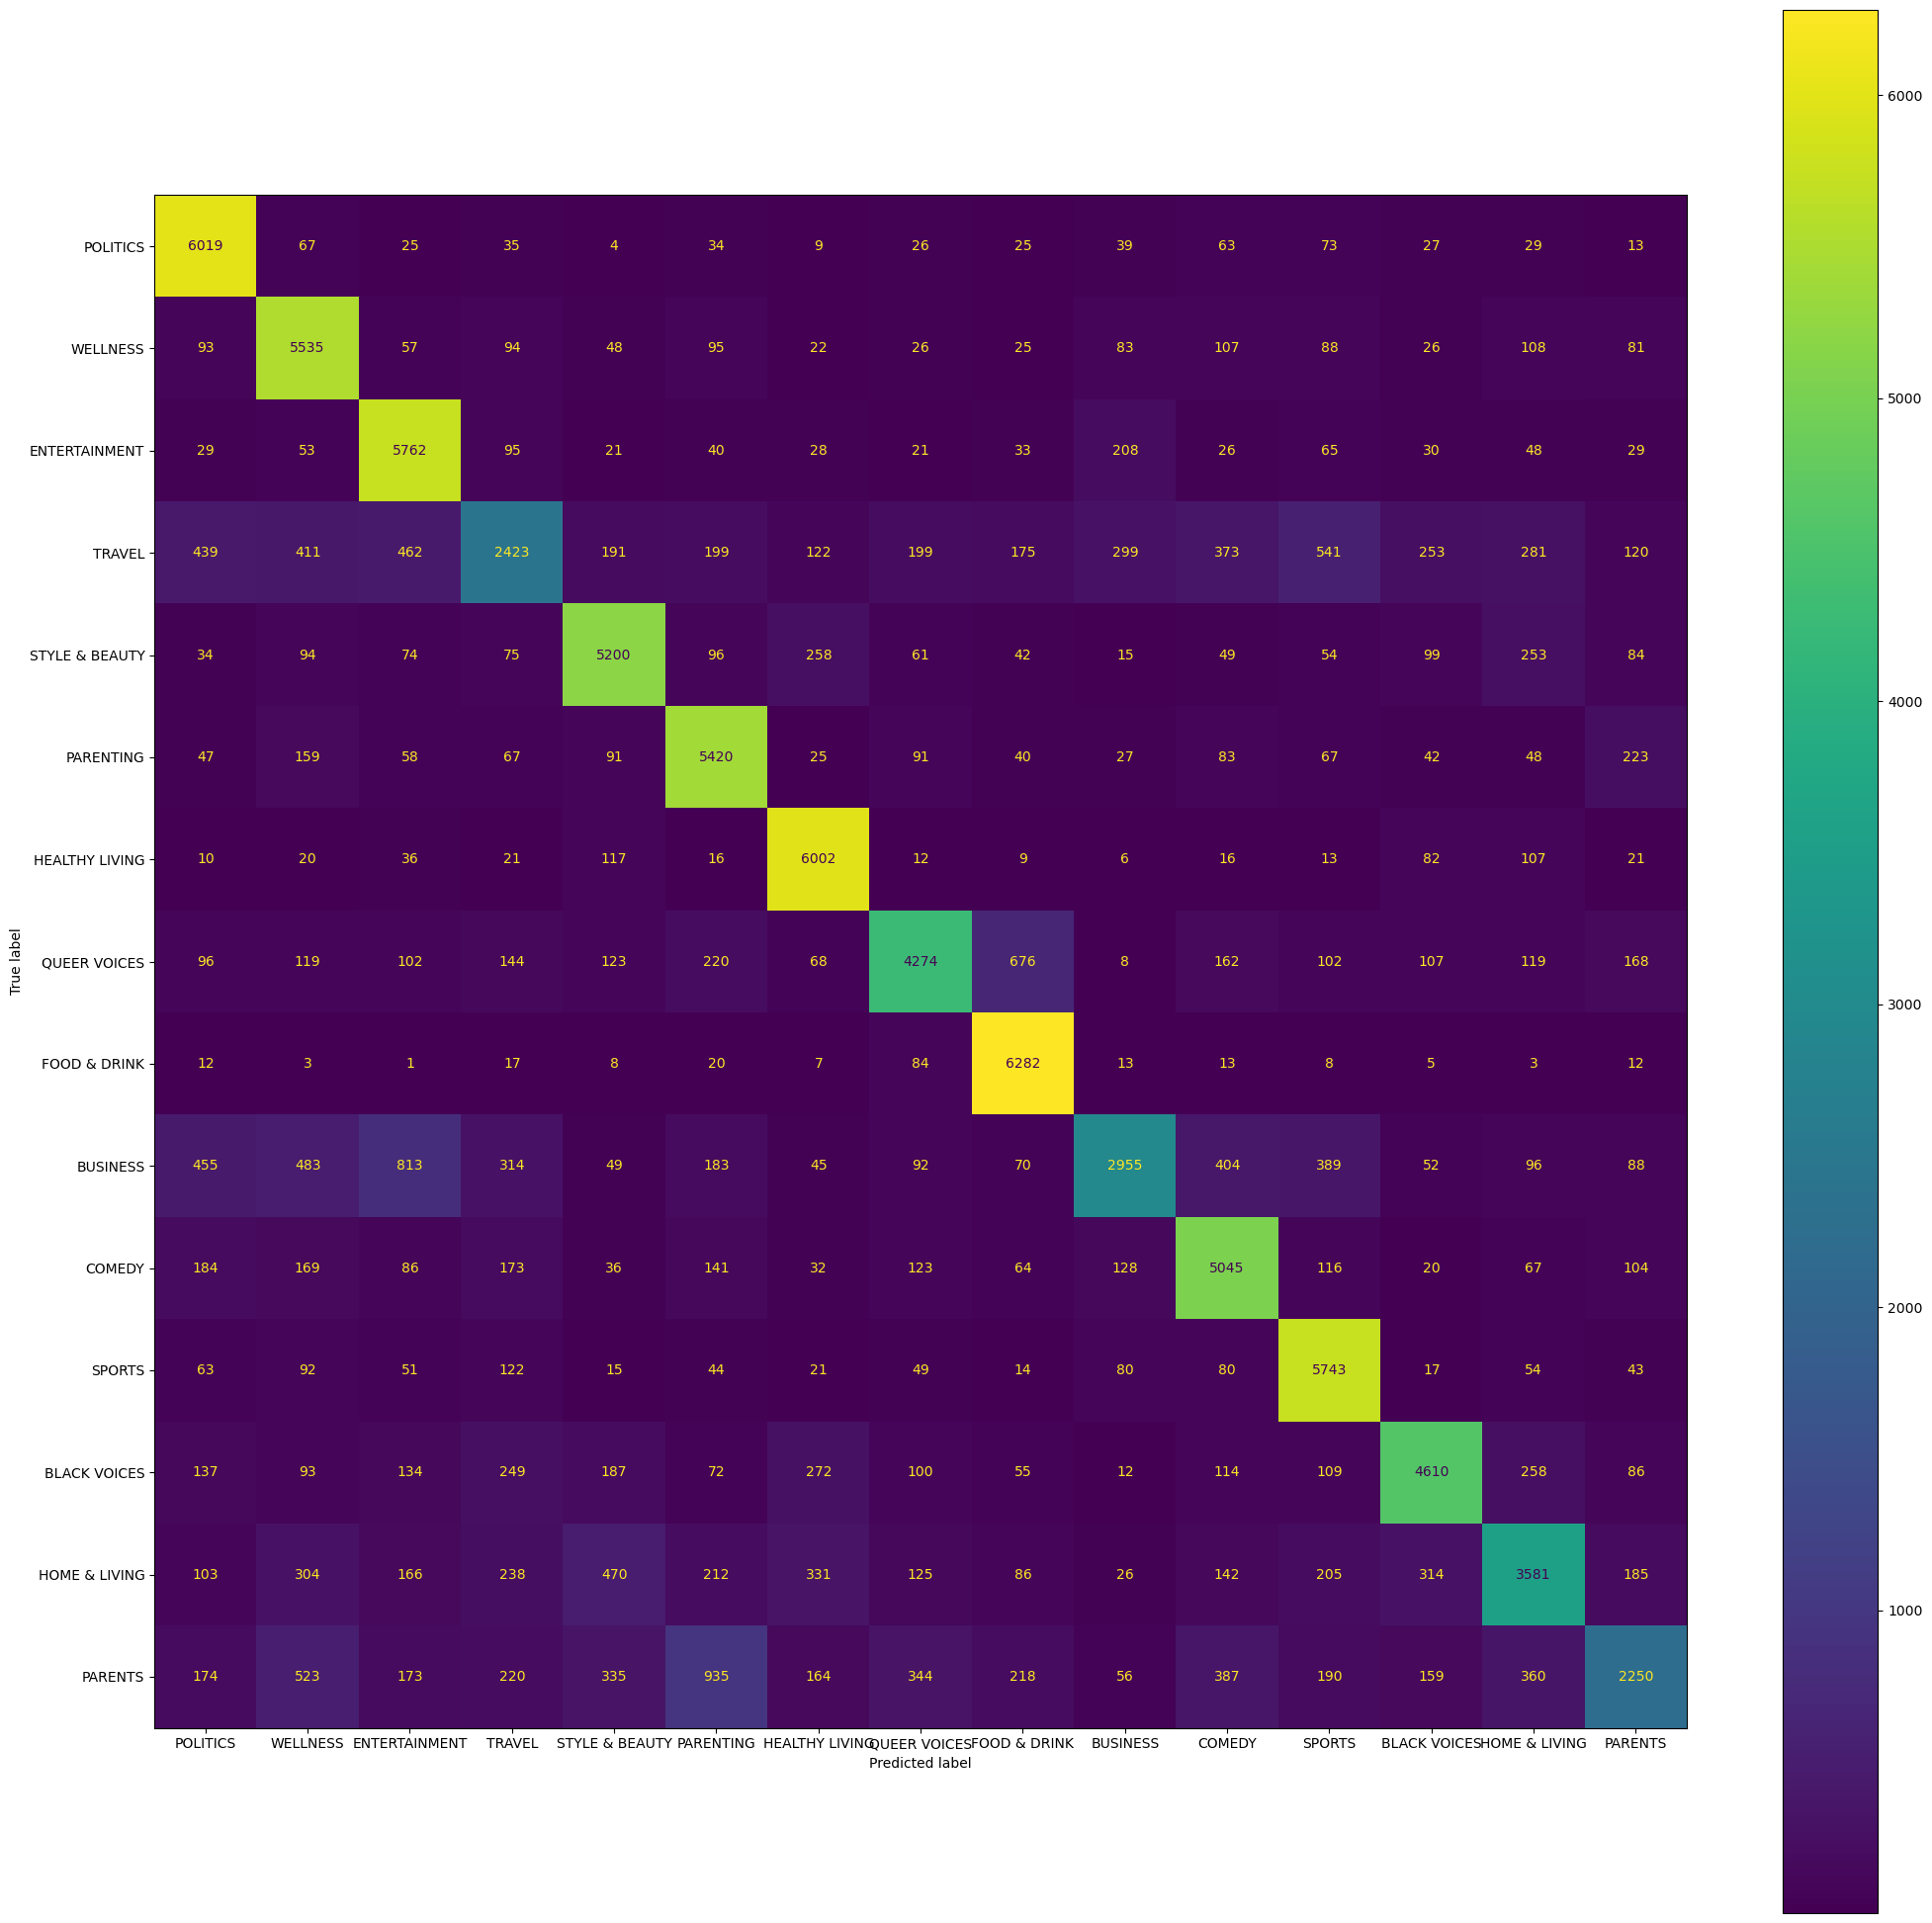

In [44]:
# Displaying prediction and actual value on Confucsion Matrix

fig, ax = plt.subplots(figsize=(25, 25))
confusion_matrix_knn = metrics.confusion_matrix(y_test_label.tolist(), pred_knn.tolist())
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_knn, display_labels = top_categories)
cm_display.plot(ax=ax)
plt.show()

## MultinomialNB Model

In [45]:
# BUilding MultinomialNB Model

nb = MultinomialNB(alpha=1e-4, fit_prior=False)
nb.fit(X_train_t, y_train_label)
pred_mnb = nb.predict(X_test_t)

In [46]:
# MultinomialNB Validation 

print("F1 Score:", metrics.f1_score(le.inverse_transform(y_test_label), le.inverse_transform(pred_mnb), average='weighted'))
print(metrics.classification_report(le.inverse_transform(y_test_label), le.inverse_transform(pred_mnb)))

F1 Score: 0.8883125466835128
                precision    recall  f1-score   support

  BLACK VOICES       0.92      0.89      0.90      6488
      BUSINESS       0.90      0.90      0.90      6488
        COMEDY       0.89      0.89      0.89      6488
 ENTERTAINMENT       0.86      0.85      0.85      6488
  FOOD & DRINK       0.93      0.95      0.94      6488
HEALTHY LIVING       0.82      0.83      0.82      6488
 HOME & LIVING       0.94      0.94      0.94      6488
     PARENTING       0.83      0.83      0.83      6488
       PARENTS       0.85      0.90      0.87      6488
      POLITICS       0.86      0.84      0.85      6488
  QUEER VOICES       0.93      0.91      0.92      6488
        SPORTS       0.96      0.95      0.95      6488
STYLE & BEAUTY       0.93      0.92      0.93      6488
        TRAVEL       0.91      0.93      0.92      6488
      WELLNESS       0.80      0.79      0.80      6488

      accuracy                           0.89     97320
     macro avg   

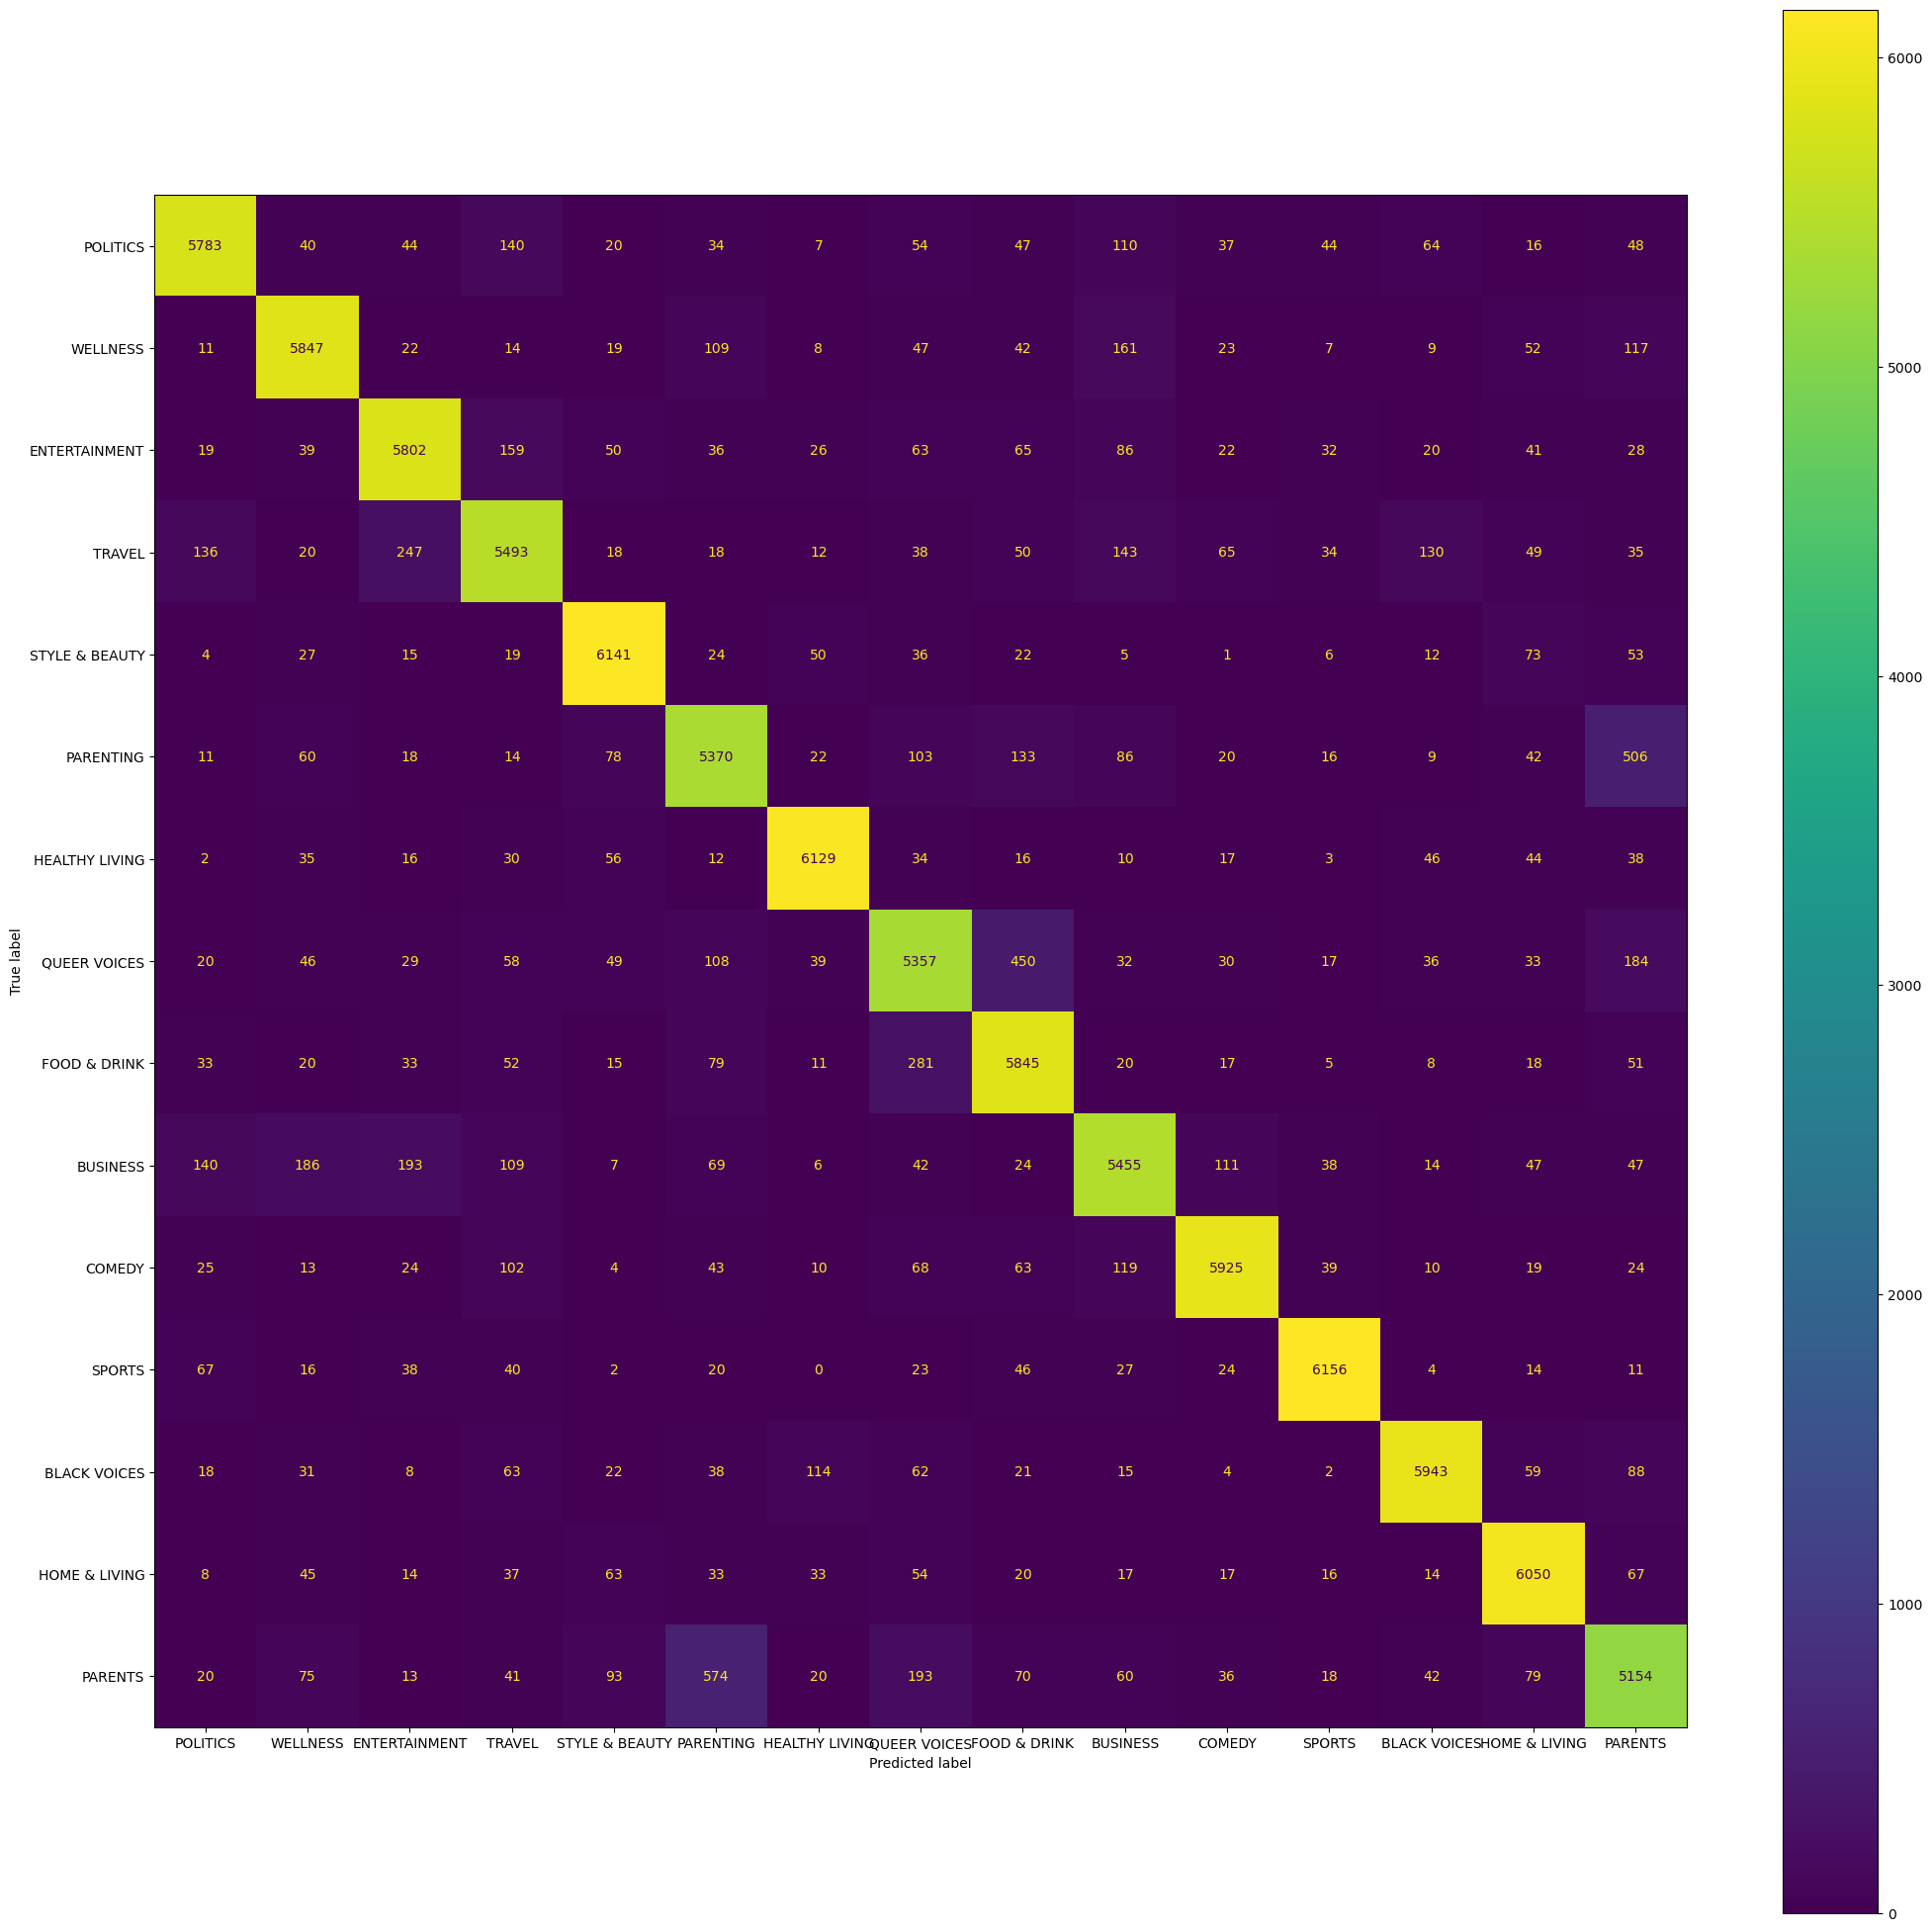

In [47]:
# Displaying prediction and actual value on Confucsion Matrix

fig, ax = plt.subplots(figsize=(25, 25))
confusion_matrix_mnb = metrics.confusion_matrix(y_test_label.tolist(), pred_mnb.tolist())
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_mnb, display_labels = top_categories)
cm_display.plot(ax=ax)
plt.show()